# Playlists

Below are investigations into listening from a playlist context. The start includes data for individual playlists before comparing a group of playlists.

## Individual Playlist Investigations

Below prepares a frame for processing and gives some high-level stats.

In [4]:
playlist_name = "ALL RAP"
playlist = get_playlist(playlist_name, spotnet)
playlist_frame = pd.merge(track_frame(playlist.tracks), scrobbles, on=['track', 'artist']) # FILTER SCROBBLES
playlist_frame = playlist_frame.sort_index(ascending=False) # SORT
playlist_frame = playlist_frame.loc[:, spotify_descriptor_headers] # DESCRIPTORS

total_time = playlist_frame["duration_ms"].sum() / (1000 * 60) # minutes
total_days = total_time / (60 * 24) # days
print(f'{playlist_frame.count()[0]:,d} scrobbles')
print(f'{total_days:.0f} days spent listening since Nov. 2017')
print(f'{total_time / days_since(first_day).days:.2f} minutes/day')

playlist_frame.describe()[1:]

10,999 scrobbles
28 days spent listening since Nov. 2017
35.41 minutes/day


,duration_ms,mode,loudness,key,tempo,time_signature,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
mean,223128.125193,0.631694,-6.733293,5.352487,118.354445,4.007455,0.179857,0.66556,0.709464,0.008645,0.244309,0.274996,0.480991
std,63610.972469,0.482367,2.482966,3.733147,31.002195,0.255755,0.186482,0.15002,0.145923,0.056757,0.172633,0.129368,0.223523
min,60867.000000,0.000000,-17.819000,0.000000,61.113000,1.000000,0.000017,0.26100,0.252000,0.000000,0.033300,0.032300,0.027200
25%,182741.000000,0.000000,-8.320000,1.000000,91.923000,4.000000,0.035000,0.55200,0.598000,0.000000,0.113000,0.181000,0.314000
50%,211200.000000,1.000000,-6.518000,6.000000,116.696000,4.000000,0.120000,0.67400,0.720000,0.000000,0.181000,0.282000,0.483000
75%,258827.000000,1.000000,-5.062000,8.000000,140.032000,4.000000,0.254000,0.77500,0.821000,0.000051,0.333000,0.361000,0.642000
max,774920.000000,1.000000,-0.140000,11.000000,207.982000,5.000000,0.864000,0.97500,0.993000,0.847000,0.979000,0.827000,0.962000


## Listnening Frequency Over Time

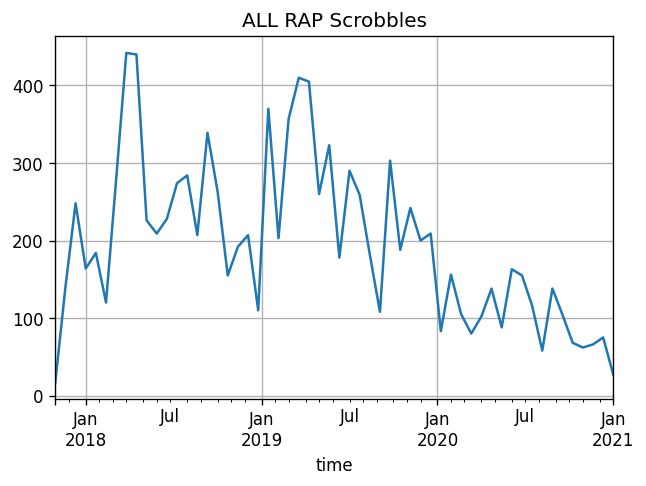

In [5]:
# filter playlists by join with playlist track/artist names
filtered_playlist = pd.merge(track_frame(playlist.tracks), scrobbles.reset_index(), on=['track', 'artist'])
# to time series, select only descriptor float columns
filtered_playlist = filtered_playlist.set_index('time').loc[:, ["energy"]]
# resample by day and mean
filtered_playlist = filtered_playlist.resample("3W").count()

filtered_playlist["energy"].plot()

plt.title(f"{playlist_name} Scrobbles")
plt.grid()
plt.show()

## Listening Characteristics Over Time

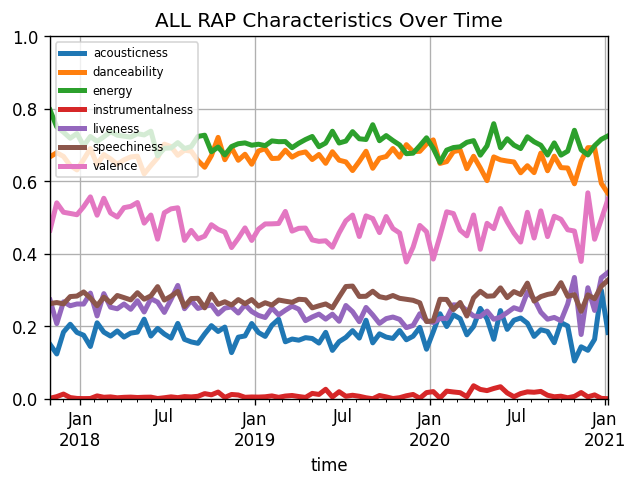

In [6]:
# filter playlists by join with playlist track/artist names
filtered_playlist = pd.merge(track_frame(playlist.tracks), scrobbles.reset_index(), on=['track', 'artist'])
# to time series
filtered_playlist = filtered_playlist.set_index('time')
# select only descriptor float columns
filtered_playlist = filtered_playlist.loc[:, float_headers]
# resample by day and mean
filtered_playlist = filtered_playlist.resample("2W").mean()

# filtered_playlist["energy"].plot()
filtered_playlist.plot(lw=3)

plt.title(f"{playlist_name} Characteristics Over Time")
plt.legend(loc = "upper left", fontsize = "x-small")
plt.ylim([0, 1])
plt.grid()
plt.show()

# Playlist Comparisons

Comparing different playlists over parameters like listening count, average plays per track and sound characteristics.

In [24]:
playlist_names = ["RAP", "EDM", "ROCK", "METAL", "JAZZ", "POP"] # super-genres
# playlist_names = ["DNB", "HOUSE", "TECHNO", "GARAGE", "DUBSTEP", "BASS"] # EDM playlists
# playlist_names = ["20s rap", "10s rap", "00s rap", "90s rap", "80s rap"] # rap decades
# playlist_names = ["UK RAP", "US RAP"] # UK/US split
# playlist_names = ["uk rap", "grime", "drill", "afro bash"] # british rap playlists
# playlist_names = ["20s rap", "10s rap", "00s rap", "90s rap", "80s rap", "trap", "gangsta rap", "industrial rap", "weird rap", "jazz rap", "boom bap", "trap metal"] # american rap playlists
# playlist_names = ["rock", "indie", "punk", "pop rock", "bluesy rock", "hard rock", "chilled rock", "emo", "pop punk", "stoner rock/metal", "post-hardcore", "melodic hardcore", "art rock", "post-rock", "classic pop punk", "90s rock & grunge", "90s indie & britpop", "psych"] # rock playlists
# playlist_names = ["metal", "metalcore", "mathcore", "hardcore", "black metal", "death metal", "doom metal", "sludge metal", "classic metal", "industrial", "nu metal", "calm metal", "thrash metal"] # metal playlists

Pull and process playlist information.

1. Get live playlist track information from spotify
2. Filter listening history for these tracks
3. Calculate various parameters and stats

In [25]:
playlists = [get_playlist(i, spotnet) for i in playlist_names] # 1)

# filter playlists by join with playlist track/artist names
filtered_playlists = [pd.merge(track_frame(i.tracks), scrobbles, on=['track', 'artist']) for i in playlists] # 2)

### STATS, 3) ###
# number of scrobbles per playlist
playlist_counts = [i.count()[0] for i in filtered_playlists]
# total time listenened per playlist
playlist_time = [i["duration_ms"].sum() for i in filtered_playlists]
# average track time per playlist
playlist_average_track_time = [i.drop_duplicates(['uri'])["duration_ms"].mean() for i in filtered_playlists]
# number of tracks per playlist
playlist_track_count = np.array([len(i.tracks) for i in playlists])

# distinct on uri
filtered_playlists = [i.drop_duplicates(['uri']) for i in filtered_playlists]
# select only descriptor float columns
filtered_playlists = [i.loc[:, float_headers] for i in filtered_playlists]

playlist_mean = [i.mean() for i in filtered_playlists]
playlist_std = [i.std() for i in filtered_playlists]

## Listening Characteristics Over Different Playlists

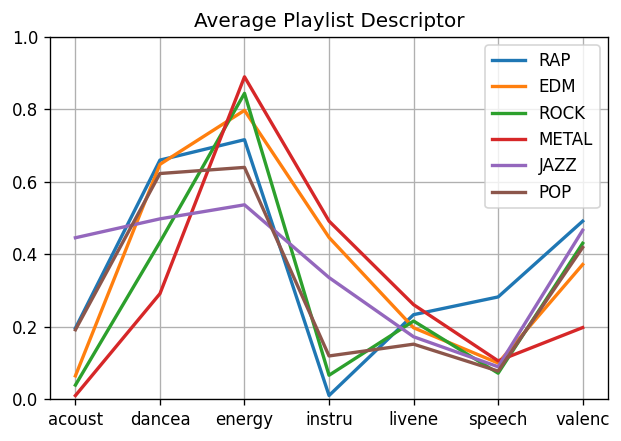

In [26]:
x_pos = np.arange(len(float_headers))
for idx, mean in enumerate(playlist_mean):
    plt.plot(x_pos, mean, lw=2)
    
plt.legend(playlist_names)
plt.xticks(x_pos, [i[:6] for i in float_headers])
plt.ylim([0, 1])
plt.title('Average Playlist Descriptor')
plt.grid()
plt.show()

## Time Spent Listening To Each

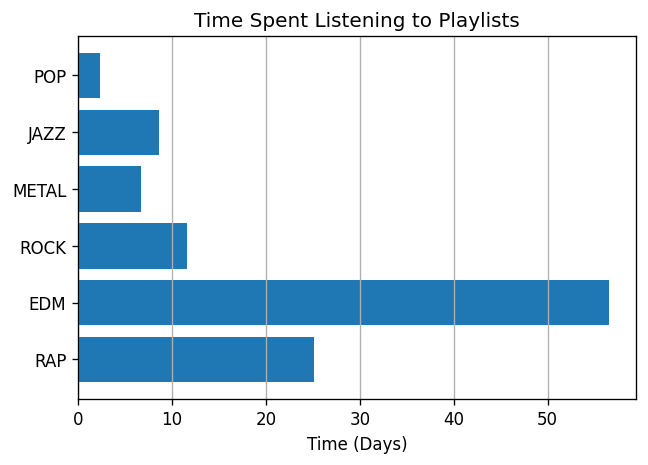

In [27]:
plt.barh(np.arange(len(playlist_names)), np.array(playlist_time) / (1000 * 60 * 60 * 24) )
plt.yticks(np.arange(len(playlist_names)), labels=playlist_names)
plt.xlabel("Time (Days)")
plt.grid(axis="x")
plt.title("Time Spent Listening to Playlists")
plt.show()

## Normalised

Below normalises the above chart by dividing through by the average track length multiplied by the number of tracks per playlist. The units are essentially average plays per song. The existing data could be described as:

*number of plays \* track time \* number of songs in playlist*

By normalising by the last two terms, we get the average number of plays per song.

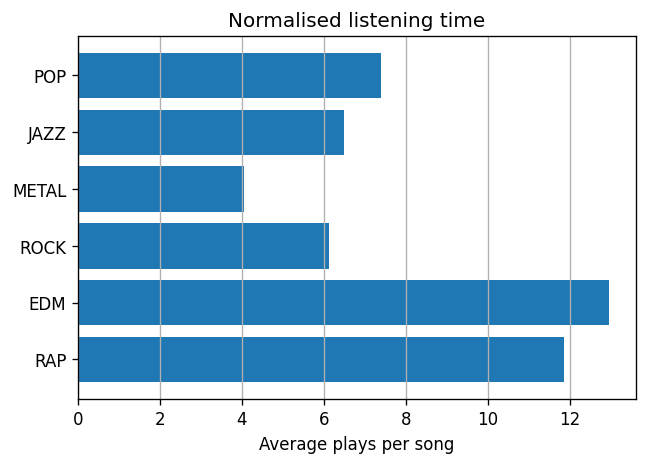

In [28]:
plt.barh(np.arange(len(playlist_names)), np.array(playlist_time) / (playlist_track_count * playlist_average_track_time) )
plt.yticks(np.arange(len(playlist_names)), labels=playlist_names)
plt.xlabel("Average plays per song")
plt.grid(axis="x")
plt.title("Normalised listening time")
plt.show()

# Imports & Setup

In [2]:
from datetime import datetime

from google.cloud import bigquery
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

from analysis.net import get_spotnet, get_playlist, track_frame
from analysis.query import *
from analysis import spotify_descriptor_headers, float_headers, days_since

import numpy as np
import pandas as pd

client = bigquery.Client()
spotnet = get_spotnet()
cache = 'query.csv'
first_day = datetime(year=2017, month=11, day=3)

## Read Scrobble Frame

In [3]:
scrobbles = get_query(cache=cache)

## Write Scrobble Frame

In [6]:
scrobbles.reset_index().to_csv(cache, sep='\t')